In [231]:
import numpy as np
import json


In [232]:
from os import walk
X = []
for a in range(1,38):
    threed = np.zeros((128,128,88))
    file_path = "/Users/yumengluo/Desktop/claire/Columbia/6156/6156-imposters2/encoding_data/"+str(a)+"/hw1-0.0.1-SNAPSHOT/controllers.PlayGame/main(String).txt"
    f = open(file_path, "r").read()
    line = f.split('\n')
    threed = np.zeros((128,128,88))
    for i in range(128):
        row = line[i][1:-2].split('}\t{')
        for j in range(128):
            if row[j] == '':
                continue
            else:
                for k in row[j].split(','):
                    threed[i][j][int(k)] = 1
   

    path = "/Users/yumengluo/Desktop/claire/Columbia/6156/6156-imposters2/encoding_data/"+str(a)+"/hw1-0.0.1-SNAPSHOT/models.GameBoard/"
    files = []
    for (dirpath, dirnames, filenames) in walk(path):
        files.extend(filenames)

    for fi in files:
        file_path = path+ fi
        f = open(file_path, "r").read()
        line = f.split('\n')

        for i in range(128):
            row = line[i][1:-2].split('}\t{')
            for j in range(128):
                if row[j] == '':
                    continue
                else:
                    for k in row[j].split(','):
                        threed[i][j][int(k)] += 1
                        
                        
                        
    X.append(threed)
train_data = np.zeros((37,128))
for i in range(len(X)):
    train_data[i] = np.sum(np.sum(X[i],axis=0),axis=1)

In [167]:
X = []
for a in range(1,38):
    file_path = "/Users/yumengluo/Desktop/claire/Columbia/6156/6156-imposters2/encoding_data/"+str(a)+"/hw1-0.0.1-SNAPSHOT/controllers.PlayGame/main(String).txt"
    #outfile = "/Users/yumengluo/Desktop/claire/Columbia/6156/6156-imposters2/encoding_data/"+str(i)+"/main.npz"
    f = open(file_path, "r").read()
    line = f.split('\n')
    threed = np.zeros((128,128,88))
    for i in range(128):
        row = line[i][1:-2].split('}\t{')
        for j in range(128):
            if row[j] == '':
                continue
            else:
                for k in row[j].split(','):
                    threed[i][j][int(k)] = 1
    X.append(threed)
test_data = np.zeros((37,88))
for i in range(len(X)):
    test_data[i] = np.sum(np.sum(X[i],axis=0),axis=0)

In [179]:
cols = np.array([ 0,  1,  2,  6, 11, 12, 18, 19, 20, 24, 29, 30, 65, 68, 72, 75, 81])
test_data = test_data[:,cols]

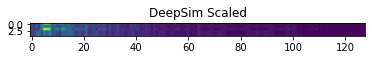

In [189]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_title("DeepSim Scaled")
im = ax.imshow(test_data,cmap='viridis')

In [196]:
file_path = "dataset/g4_128.npy"
dataset = np.load(file_path,allow_pickle=True)
X, y = np.array(dataset['X'],dtype=object), np.array(dataset['y'], dtype=np.int)

train_data = np.zeros((160,128))
index = np.random.permutation(1669)[:160]
X = X[index]
y = y[index]
for i in range(len(X)):
    threed = np.zeros((128,128,88))
    for j in range(len(X[i])):
        a,b,c = X[i][j]
        threed[a][b][c] = 1
    train_data[i] = np.sum(np.sum(threed,axis=0),axis=1)

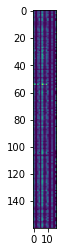

In [183]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
im = ax.imshow(train_data,cmap='viridis')

In [233]:
test_data.shape

(5, 128)

In [199]:
x = train_data
x_train = np.zeros((int(len(x)*(len(x)-1)/2), 256))
y_train_label = np.zeros(int((len(x)*(len(x)-1)/2)))
for i in range(len(x)):
    for j in range(i+1,len(x)):
        ind = int((2*len(x)-i-1)*i/2+j-i-1)
        x_train[ind][:128]=x[i]
        x_train[ind][128:]=x[j]
        if y[i]==y[j]:
            y_train_label[ind] = 1.0

In [219]:
x = train_data
#x_test = np.zeros((int(len(x)*(len(x)-1)/2), 128))
#for i in range(len(x)):
#    for j in range(i+1,len(x)):
#        ind = int((2*len(x)-i-1)*i/2+j-i-1)
#        x_test[ind][:128]=x[i]
#        x_test[ind][128:]=x[j]
#y_test_label = np.zeros(int((len(x)*(len(x)-1)/2)))

#true_matrix = np.zeros((5,5))
true = [(2,4),(2,13),(2,19),(4,13),(4,19),(5,19),(9,30),(9,35),(9,36),(9,37),(13,19),(14,30),(16,30),(17,31),(19,31),(20,31),(22,30),(23,31),(30,35),(30,36),(30,37),(35,36),(35,37),(36,37)]
y_single_test = np.zeros(37)
for a ,b in true:
    i,j=a-1,b-1
    ind = int((2*len(x)-i-1)*i/2+j-i-1)
    #y_test_label[ind]=1
    #true_matrix[i][j] = 1
    y_single_test[i]=1
    y_single_test[j]=1
for i in range(5):
    for j in range(i+1,5):
        true_matrix[i][j]=1

In [225]:
np.savez("/Users/yumengluo/Desktop/claire/Columbia/6156/6156-imposters2/encoding_data/ds_train4.npz",
         x_train = train_data,
         x_test = test_data,
         y_train = y_single_test,
        y_test = y_test)

In [224]:
y_test = np.ones(5)

In [163]:
np.where(test_data[0])

(array([ 0,  1,  2,  6, 11, 12, 18, 19, 20, 24, 29, 30, 65, 68, 72, 75, 81]),)

(160,)

In [51]:
for i in range(1,38):
    print("cp ../../original_github_data/"+str(i)+"/src/main/java/controllers/PlayGame.java "+str(i)+"/")
    #print(" ~/Desktop/claire/Columbia/6156/6156-imposters2/original_github_data/"+str(i)+"/src/main/java/controllers/PlayGame.java\\")

cp ../../original_github_data/1/src/main/java/controllers/PlayGame.java 1/
cp ../../original_github_data/2/src/main/java/controllers/PlayGame.java 2/
cp ../../original_github_data/3/src/main/java/controllers/PlayGame.java 3/
cp ../../original_github_data/4/src/main/java/controllers/PlayGame.java 4/
cp ../../original_github_data/5/src/main/java/controllers/PlayGame.java 5/
cp ../../original_github_data/6/src/main/java/controllers/PlayGame.java 6/
cp ../../original_github_data/7/src/main/java/controllers/PlayGame.java 7/
cp ../../original_github_data/8/src/main/java/controllers/PlayGame.java 8/
cp ../../original_github_data/9/src/main/java/controllers/PlayGame.java 9/
cp ../../original_github_data/10/src/main/java/controllers/PlayGame.java 10/
cp ../../original_github_data/11/src/main/java/controllers/PlayGame.java 11/
cp ../../original_github_data/12/src/main/java/controllers/PlayGame.java 12/
cp ../../original_github_data/13/src/main/java/controllers/PlayGame.java 13/
cp ../../original

In [52]:
"sed -i 's/app.post(\"/echo\", ctx -> {/if (app==\"echo\"){/g' PlayGame.java"

'sed -i \'s/app.post("/echo", ctx -> {/if (app=="echo"){/g\' PlayGame.java'

In [208]:
test_data.shape

(5, 128)

In [209]:
from sklearn.metrics.pairwise import cosine_similarity
cos_matrix = np.zeros((5,5))
for  i in range(5):
    for j in range(i+1,5):
        cos_matrix[i][j] = cosine_similarity([test_data[i]], [test_data[j]]) 

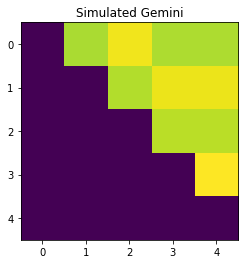

In [212]:
fig, ax = plt.subplots()
ax.set_title("Simulated Gemini")
im = ax.imshow(cos_matrix,cmap='viridis')

In [213]:
cos_matrix

array([[0.        , 0.87312713, 0.97965611, 0.877077  , 0.877077  ],
       [0.        , 0.        , 0.88292851, 0.9720399 , 0.9720399 ],
       [0.        , 0.        , 0.        , 0.89485977, 0.89485977],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])